In [1]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import CNN_softmax_and_SVM

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

step: 10, loss: 197.760880, accuracy: 0.380000
step: 20, loss: 185.013031, accuracy: 0.450000
step: 30, loss: 199.745026, accuracy: 0.390000
step: 40, loss: 175.078857, accuracy: 0.510000
step: 50, loss: 166.538422, accuracy: 0.380000
step: 60, loss: 154.687836, accuracy: 0.470000
step: 70, loss: 145.822632, accuracy: 0.590000
step: 80, loss: 146.638580, accuracy: 0.540000
step: 90, loss: 156.564926, accuracy: 0.430000
step: 100, loss: 164.819443, accuracy: 0.450000
step: 110, loss: 148.860992, accuracy: 0.540000
step: 120, loss: 147.407104, accuracy: 0.470000
step: 130, loss: 182.661026, accuracy: 0.340000
step: 140, loss: 122.225739, accuracy: 0.600000
step: 150, loss: 133.112259, accuracy: 0.510000
step: 160, loss: 116.819260, accuracy: 0.610000
step: 170, loss: 114.947083, accuracy: 0.610000
step: 180, loss: 130.464691, accuracy: 0.540000
step: 190, loss: 100.263344, accuracy: 0.730000
step: 200, loss: 106.209648, accuracy: 0.610000


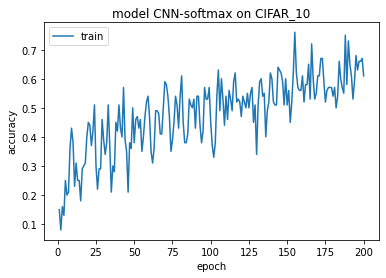

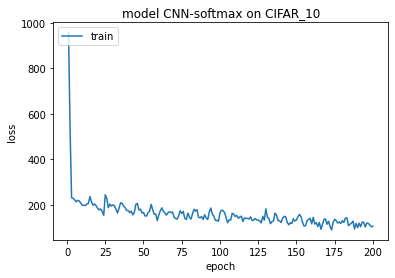

The accuracy of CNN-softmax on the testset is 0.447299987077713


In [2]:
model = CNN_softmax_and_SVM.CNN_softmax( num_classes = 10, 
                     conv1_filters = 32, # number of filters for 1st conv layer.
                     conv2_filters = 64, # number of filters for 2nd conv layer.
                     fc1_units = 3072, # number of neurons for 1st fully-connected layer.
                     kernel_len = 5)

step_list, loss_list, acc_list = model.fit( x_train, y_train, 
                                            image_width = 32, 
                                            optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
                                            training_steps = 200, 
                                            display_step = 10 , 
                                            batch_size = 100,
                                            pooling_merge_number = 2, 
                                            dropout_rate = 0.2,
                                            channels = 3,)
CNN_softmax_and_SVM.draw( datasetname = "CIFAR_10",modelname = model.name, 
                         step_list = step_list, acc_list = acc_list, loss_list = loss_list)
model.evaluate(x_test,tf.transpose(y_test)[0])

step: 10, loss: 439.473511, accuracy: 0.250000
step: 20, loss: 419.843506, accuracy: 0.250000


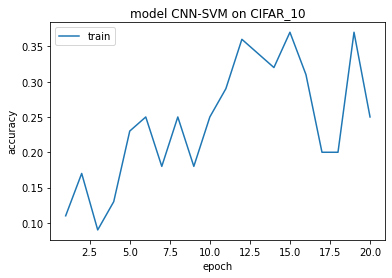

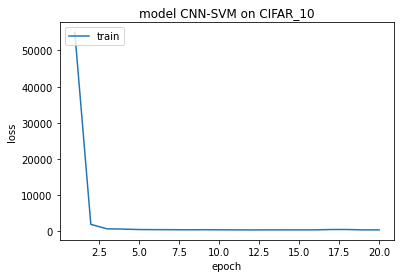

The accuracy of CNN-SVM on the testset is 0.219200000166893


In [3]:
model = CNN_softmax_and_SVM.CNN_SVM( num_classes = 10, 
                     conv1_filters = 32, # number of filters for 1st conv layer.
                     conv2_filters = 64, # number of filters for 2nd conv layer.
                     fc1_units = 3072, # number of neurons for 1st fully-connected layer.
                     penality_parameter= 1,
                     kernel_len = 5)

step_list, loss_list, acc_list = model.fit( x_train, y_train, 
                                            image_width = 32, 
                                            optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
                                            training_steps = 200, 
                                            display_step = 10 , 
                                            batch_size = 100,
                                            pooling_merge_number = 2, 
                                            dropout_rate = 0.2,
                                            channels = 3,)
CNN_softmax_and_SVM.draw( datasetname = "CIFAR_10",modelname = model.name, 
                         step_list = step_list, acc_list = acc_list, loss_list = loss_list)

model.evaluate(x_test,tf.transpose(y_test)[0])